## Drowsiness Detection via YOLOv5

* Deep Learning Model

---

### Dependencies and Libraries

Dependencies Installation

In [ ]:
# NVIDIA's CUDA Compile
!nvcc --version

In [ ]:
# Version of GPU's driver
!nvidia-smi

In [ ]:
# Installing PyTorch
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

In [ ]:
# Installing YOLOv5
!git clone https://github.com/ultralytics/yolov5 

In [ ]:
# Installing pip-requirements of YOLOv5
!pip install -r yolov5/requirements.txt

In [ ]:
# Installing labelImg
!git clone https://github.com/heartexlabs/labelImg

In [ ]:
!pip install pyqt5 lxml --upgrade

import os
cwd = os.getcwd()

os.chdir('labelImg')
!pyrcc5 -o libs/resources.py resources.qrc

os.chdir(cwd)

Library imports

In [ ]:
import uuid
import os
import time

import numpy as np
import matplotlib.pyplot as plt

import torch
import cv2

---

### Model Loading

Loading YOLOv5

In [ ]:
# Loading YOLOv5
default_model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

---

### Default Model Detections

**Pretrained detections by YOLOv5**

Image Detections

In [12]:
def default_detection(model:torch.nn.Module , img:str) -> None:
    detections = model(img)
    detections.print()
    
    %matplotlib inline
    plt.imshow(np.squeeze(detections.render()))
    plt.show()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 1820.8ms pre-process, 48.5ms inference, 3.0ms NMS per image at shape (1, 3, 384, 640)


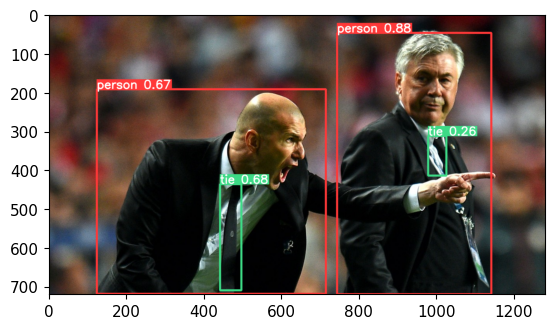

In [13]:
default_detection(default_model, 'https://ultralytics.com/images/zidane.jpg')

Real-Time Detections

In [14]:
def default_realtime_detections(model:object) -> None:
    cap = cv2.VideoCapture(0)

    while cap.isOpened():
        ret, frame = cap.read()

        results = model(frame)

        cv2.imshow('YOLOv5 Detection', np.squeeze(results.render()))

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [ ]:
default_realtime_detections(default_model)

### Default Real Time Detections

---

### Custom Training

Training model for drowsiness and awake, using custom images

In [ ]:
# def capture_images():
path = os.path.join('data', 'images')
labels = ['awake', 'drowsy']
img_counts = 20
cap = cv2.VideoCapture(0)
for label in labels:
    print(f'Saving images for {label}')
    time.sleep(5)

    for count in range(1, img_counts+1):
        print(f'Saving image {count} for {label}')

        # Get camera
        ret, frame = cap.read()

        if not os.path.exists(path):
            os.makedirs(path)
            print(f"Created directory: {path}.")

        img_name = os.path.join(path, label + '-' + str(uuid.uuid1()) + '.jpg')

        # Save image to file
        cv2.imwrite(img_name, frame)

        # Render the image
        cv2.imshow('Collected image', frame)

        time.sleep(2)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [ ]:
path = 'data/labels'
if not os.path.exists(path):
    os.makedirs(path)
    print(f"Created directory: {path}.")

In [ ]:
cwd = os.getcwd()

labelImg_path = 'labelImg/'
os.chdir(labelImg_path)

!python labelImg.py

os.chdir(cwd)

In [ ]:
!python yolov5/train.py --img 320 --batch 16 --epochs 500 --data yolov5/dataset.yml --weights yolov5s.pt

---

### Loading Trained Model

Loading trained model to detect **drowsiness** and **awake**

Image Detections

In [15]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp2/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\linta/.cache\torch\hub\master.zip
YOLOv5  2023-6-25 Python-3.11.3 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce MX250, 2048MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [32]:
awake_img_path = os.path.join('data', 'images', 'awake-f7a3ce99-01e9-11ee-b7af-c809a8dd26ff.jpg')
drowsy_img_path = os.path.join('data', 'images', 'drowsy-1f103d97-01ea-11ee-9b82-c809a8dd26ff.jpg')

In [33]:
results_awake = model(awake_img_path)
results_drowsy = model(drowsy_img_path)

In [34]:
results_awake.print()

image 1/1: 480x640 1 awake
Speed: 175.2ms pre-process, 154.1ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


In [35]:
results_drowsy.print()

image 1/1: 480x640 1 drowsy
Speed: 0.0ms pre-process, 43.8ms inference, 2.5ms NMS per image at shape (1, 3, 480, 640)


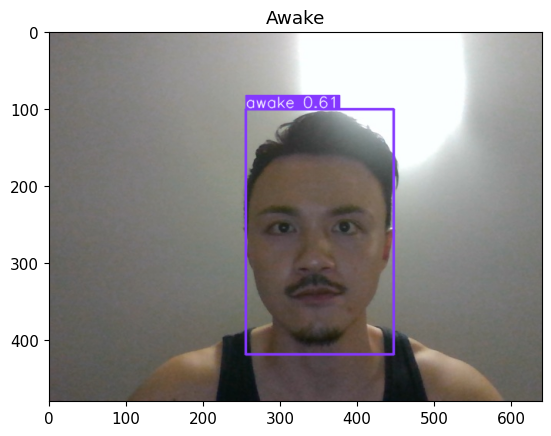

In [36]:
%matplotlib inline
plt.imshow(np.squeeze(results_awake.render()))
plt.title('Awake')
plt.show()

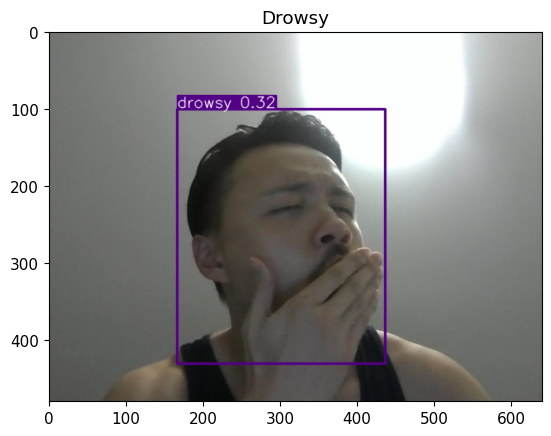

In [38]:
%matplotlib inline
plt.imshow(np.squeeze(results_drowsy.render()))
plt.title('Drowsy')
plt.show()

Real-Time Detections

In [ ]:
default_realtime_detections(default_model)